# 앙상블 주식 채권 비중별


# <주의> 월초 리밸런싱, 월말 종가 기준 계산은 children 에서 정상동작하지 않는다.

- children 전략이 월말
- 상위 전략이 월초

이런 경우 정상동작하지 않는다.

In [1]:
from settings import *

In [2]:
tickers = ['SPY', 'TLT']
data = yf.download(tickers)['Adj Close']
data = data.dropna()
data.info()

[*********************100%***********************]  2 of 2 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4926 entries, 2002-07-30 to 2022-02-18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     4926 non-null   float64
 1   TLT     4926 non-null   float64
dtypes: float64(2)
memory usage: 115.5 KB


In [3]:
data['2003-7']

,SPY,TLT
Date,,
2003-07-01,68.742,49.689
2003-07-02,69.607,49.814
2003-07-03,68.888,49.099
2003-07-07,70.256,48.784
2003-07-08,70.570,48.828
2003-07-09,70.172,48.985
2003-07-10,69.279,48.969
2003-07-11,69.935,49.202
2003-07-14,70.277,48.638


In [4]:
s = '2002-7-31'
e = '2017-6-30'
start = '2003-3-3'

In [5]:
data = data[s:]

In [6]:
data

,SPY,TLT
Date,,
2002-07-31,62.528,42.671
2002-08-01,60.895,42.914
2002-08-02,59.530,43.353
2002-08-05,57.459,43.544
2002-08-06,59.393,43.172
...,...,...
2022-02-14,439.020,136.530
2022-02-15,446.100,134.980
2022-02-16,446.600,135.780


In [37]:
def strategy(name, data, index, bond):
    s = bt.Strategy(name,
            [
                bt.algos.RunMonthly(run_on_end_of_period=True), 
                bt.algos.SelectAll(),
                bt.algos.WeighSpecified(SPY=index, TLT=bond),
                PrintTempWeights(),
                bt.algos.Rebalance(),
            ],
            ["SPY", "TLT"])

    return bt.Backtest(s, data, initial_capital=100000000.0)

In [38]:
t1 = strategy("t1",   data, 1.0, 0.0)
t2 = strategy("t2",   data, 0.9, 0.1)
t3 = strategy("t3",   data, 0.8, 0.2)
t4 = strategy("t4",   data, 0.7, 0.3)
t5 = strategy("t5",   data, 0.6, 0.4)
t6 = strategy("t6",   data, 0.5, 0.5)
t7 = strategy("t7",   data, 0.4, 0.6)
t8 = strategy("t8",   data, 0.3, 0.7)
t9 = strategy("t9",   data, 0.2, 0.8)
t10 = strategy("t10", data, 0.1, 0.9)
t11 = strategy("t11", data, 0.0, 1.0)

In [72]:
st1 = bt.Strategy("t1",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=1.0, TLT=0.0),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st2 = bt.Strategy("t2",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.9, TLT=0.1),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st3 = bt.Strategy("t3",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.8, TLT=0.2),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st4 = bt.Strategy("t4",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.7, TLT=0.3),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st5 = bt.Strategy("t5",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.6, TLT=0.4),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st6 = bt.Strategy("t6",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.5, TLT=0.5),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st7 = bt.Strategy("t7",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.4, TLT=0.6),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st8 = bt.Strategy("t8",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.3, TLT=0.7),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st9 = bt.Strategy("t9",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.2, TLT=0.8),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st10 = bt.Strategy("t10",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.1, TLT=0.9),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)
st11 = bt.Strategy("t11",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True), 
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(SPY=0.0, TLT=1.0),
            PrintTempWeights(),
            bt.algos.Rebalance(),
        ],
)



In [39]:
class StatCalcRiskAdjustedReturn(bt.Algo):
    def __init__(self, lookback=6):
        super(StatCalcRiskAdjustedReturn, self).__init__()
        self.lookback = lookback

    def __call__(self, target):
        selected = target.temp['selected']

        prev_month = target.now - pd.DateOffset(months=1)
        t0 = prev_month.strftime("%Y-%m")
        start = (prev_month - pd.DateOffset(months=self.lookback)).strftime("%Y-%m")

        prc = target.universe.loc[start:t0, selected].resample('M').last()

        월별수익률 = prc.pct_change().dropna()
        변동성 = 월별수익률.std()

        모멘텀 = prc.calc_total_return()
        stats = 모멘텀/변동성
        print(f"@@@@ {target.now} {target.universe.loc[target.now, :]}")
        print(f"=== {t0} {start} \n{prc}\n==월별수익률\n{월별수익률} \n==returns\n{모멘텀} \n==std\n{변동성}\nstats==\n{stats}\n")

        target.temp['stat'] = pd.Series(stats, index=prc.columns)

        return True

In [40]:
after_date = (datetime.strptime(start, '%Y-%m-%d') - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
after_date

'2003-03-02'

In [73]:
# s = bt.Strategy("ensemble",
#         [
#             bt.algos.RunMonthly(run_on_end_of_period=True),
#             bt.algos.RunAfterDate(after_date),
#             bt.algos.SelectAll(),
#             #-------------------------------------------
#             StatCalcRiskAdjustedReturn(lookback=6),
#             bt.algos.SelectN(3),
#             bt.algos.WeighEqually(),
#             #-------------------------------------------
#             PrintTempWeights(),
#             bt.algos.Rebalance()
#         ]
# )

# st = bt.Strategy("ensemble", 
#         [
#             bt.algos.RunMonthly(run_on_end_of_period=False),
#             bt.algos.RunAfterDate(after_date),
#             bt.algos.SelectAll(),
#             #-------------------------------------------------------------
#             StatCalcRiskAdjustedReturn(lookback=6),
#             bt.algos.SelectN(3),
#             # bt.algos.SelectMomentum(n=3, lookback=pd.DateOffset(months=3)),
#             bt.algos.WeighEqually(),
#             #-------------------------------------------------------------
#             PrintTempWeights(),
#             bt.algos.Rebalance()
#         ],
#         [t1.strategy, t2.strategy,t3.strategy,t4.strategy,t5.strategy,t6.strategy,t7.strategy,
#          t8.strategy,t9.strategy,t10.strategy,t11.strategy]
# )

st = bt.Strategy("ensemble", 
        [
            bt.algos.RunMonthly(run_on_end_of_period=False),
            bt.algos.RunAfterDate(after_date),
            bt.algos.SelectAll(),
            #-------------------------------------------------------------
            StatCalcRiskAdjustedReturn(lookback=6),
            bt.algos.SelectN(3),
            # bt.algos.SelectMomentum(n=3, lookback=pd.DateOffset(months=3)),
            bt.algos.WeighEqually(),
            #-------------------------------------------------------------
            PrintTempWeights(),
            bt.algos.Rebalance()
        ],
        [st1,st2,st3,st4,st5,st6,st7,st8,st9,st10,st11]
)



In [74]:
bt_ensemble = bt.Backtest(st, data, initial_capital=100000000.0)
r = bt.run(bt_ensemble)

2002-07-31 00:00:00 t1 SPY:1.000 TLT:0.000 
2002-07-31 00:00:00 t2 SPY:0.900 TLT:0.100 
2002-07-31 00:00:00 t3 SPY:0.800 TLT:0.200 
2002-07-31 00:00:00 t4 SPY:0.700 TLT:0.300 
2002-07-31 00:00:00 t5 SPY:0.600 TLT:0.400 
2002-07-31 00:00:00 t6 SPY:0.500 TLT:0.500 
2002-07-31 00:00:00 t7 SPY:0.400 TLT:0.600 
2002-07-31 00:00:00 t8 SPY:0.300 TLT:0.700 
2002-07-31 00:00:00 t9 SPY:0.200 TLT:0.800 
2002-07-31 00:00:00 t10 SPY:0.100 TLT:0.900 
2002-07-31 00:00:00 t11 SPY:0.000 TLT:1.000 
2002-07-31 00:00:00 t1 SPY:1.000 TLT:0.000 
2002-07-31 00:00:00 t2 SPY:0.900 TLT:0.100 
2002-07-31 00:00:00 t3 SPY:0.800 TLT:0.200 
2002-07-31 00:00:00 t4 SPY:0.700 TLT:0.300 
2002-07-31 00:00:00 t5 SPY:0.600 TLT:0.400 
2002-07-31 00:00:00 t6 SPY:0.500 TLT:0.500 
2002-07-31 00:00:00 t7 SPY:0.400 TLT:0.600 
2002-07-31 00:00:00 t8 SPY:0.300 TLT:0.700 
2002-07-31 00:00:00 t9 SPY:0.200 TLT:0.800 
2002-07-31 00:00:00 t10 SPY:0.100 TLT:0.900 
2002-07-31 00:00:00 t11 SPY:0.000 TLT:1.000 
2002-08-30 00:00:00 t1 SPY:1

In [75]:
r.set_date_range(start,e)
r.display()

Stat                 ensemble
-------------------  ----------
Start                2003-03-03
End                  2017-06-30
Risk-free rate       0.00%

Total Return         162.66%
Daily Sharpe         0.80
Daily Sortino        1.28
CAGR                 6.97%
Max Drawdown         -24.28%
Calmar Ratio         0.29

MTD                  0.65%
3m                   3.01%
6m                   8.87%
YTD                  8.87%
1Y                   14.51%
3Y (ann.)            5.80%
5Y (ann.)            8.70%
10Y (ann.)           7.56%
Since Incep. (ann.)  6.97%

Daily Sharpe         0.80
Daily Sortino        1.28
Daily Mean (ann.)    7.15%
Daily Vol (ann.)     8.98%
Daily Skew           0.06
Daily Kurt           7.06
Best Day             4.16%
Worst Day            -3.76%

Monthly Sharpe       0.77
Monthly Sortino      1.47
Monthly Mean (ann.)  7.23%
Monthly Vol (ann.)   9.44%
Monthly Skew         0.48
Monthly Kurt         7.12
Best Month           12.40%
Worst Month          -12.58%

Yearly 

In [76]:
r.prices.resample('M').last().to_drawdown_series().min()

ensemble   -0.199
dtype: float64

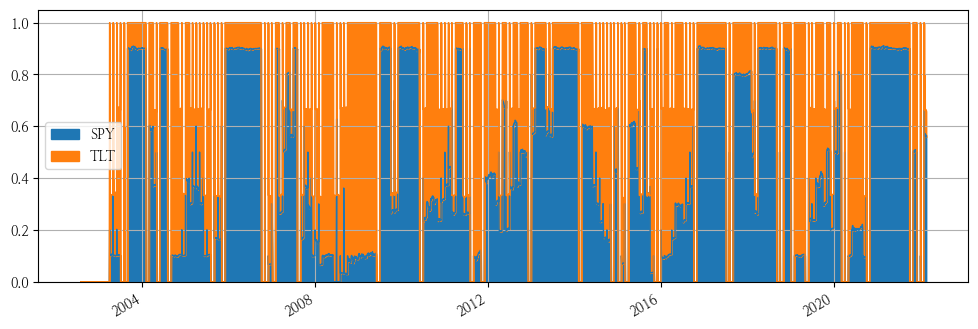

In [77]:
r.get_security_weights().plot.area(figsize=(12,4));

Q> 왜 비중 0이 나오는 걸까?
- log상으로는 정상적인 것 같은데....weights나 get_transactions가 완전히 다르다.
- 2003-7-1 0, 0 이다.
- get_transactions()도 엉망이다.

In [78]:
r.get_security_weights().to_csv("w1.csv")

In [79]:
r.get_transactions().to_csv("t.csv")

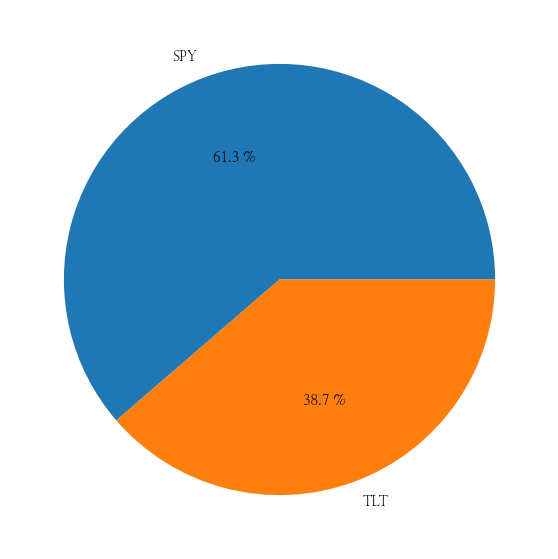

In [80]:
r.get_security_weights().sum(axis=0).plot.pie(autopct='%.1f %%', ylabel='', figsize=(7,7));

In [81]:
bt_spy = long_only_ew(data, ['SPY'], 'SPY')
bt_tlt = long_only_ew(data, ['TLT'], 'TLT')

r_spy = bt.run(bt_spy)
r_tlt  = bt.run(bt_tlt)

2002-07-31 00:00:00
2002-07-31 00:00:00


In [82]:
st_ew = bt.Strategy("ew",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True),
            bt.algos.RunAfterDate(after_date),
            bt.algos.SelectAll(),
            #-------------------------------------------
            bt.algos.WeighEqually(),
            #-------------------------------------------
            PrintTempWeights(),
            bt.algos.Rebalance()
        ]
)
bt_ew = bt.Backtest(st_ew, data, initial_capital=100000000.0)
r_ew = bt.run(bt_ew)

2003-03-31 00:00:00 ew SPY:0.500 TLT:0.500 
2003-04-30 00:00:00 ew SPY:0.500 TLT:0.500 
2003-05-30 00:00:00 ew SPY:0.500 TLT:0.500 
2003-06-30 00:00:00 ew SPY:0.500 TLT:0.500 
2003-07-31 00:00:00 ew SPY:0.500 TLT:0.500 
2003-08-29 00:00:00 ew SPY:0.500 TLT:0.500 
2003-09-30 00:00:00 ew SPY:0.500 TLT:0.500 
2003-10-31 00:00:00 ew SPY:0.500 TLT:0.500 
2003-11-28 00:00:00 ew SPY:0.500 TLT:0.500 
2003-12-31 00:00:00 ew SPY:0.500 TLT:0.500 
2004-01-30 00:00:00 ew SPY:0.500 TLT:0.500 
2004-02-27 00:00:00 ew SPY:0.500 TLT:0.500 
2004-03-31 00:00:00 ew SPY:0.500 TLT:0.500 
2004-04-30 00:00:00 ew SPY:0.500 TLT:0.500 
2004-05-28 00:00:00 ew SPY:0.500 TLT:0.500 
2004-06-30 00:00:00 ew SPY:0.500 TLT:0.500 
2004-07-30 00:00:00 ew SPY:0.500 TLT:0.500 
2004-08-31 00:00:00 ew SPY:0.500 TLT:0.500 
2004-09-30 00:00:00 ew SPY:0.500 TLT:0.500 
2004-10-29 00:00:00 ew SPY:0.500 TLT:0.500 
2004-11-30 00:00:00 ew SPY:0.500 TLT:0.500 
2004-12-31 00:00:00 ew SPY:0.500 TLT:0.500 
2005-01-31 00:00:00 ew SPY:0.500

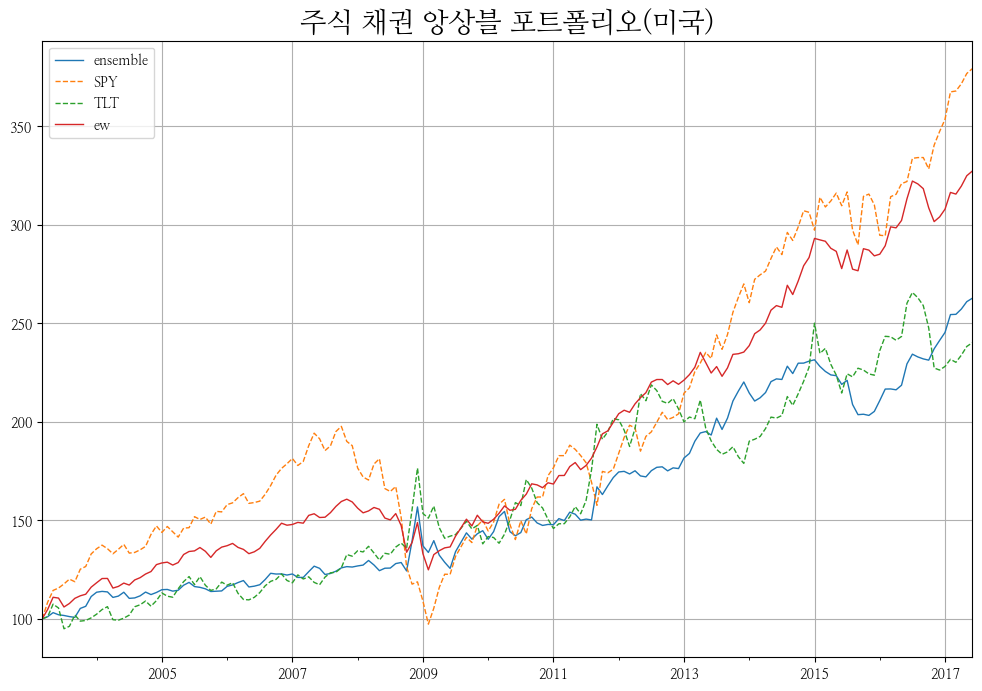

In [83]:
r_spy.set_date_range(start,e)
r_tlt.set_date_range(start,e)
r_ew.set_date_range(start,e)

ax1 = r.plot(freq='M', figsize=(12,8));
r_spy.plot(ax=ax1, freq='M', ls='--', figsize=(12,8));
r_tlt.plot(ax=ax1, freq='M', ls='--', figsize=(12,8))
r_ew.plot(ax=ax1, freq='M', ls='-', figsize=(12,8))
plt.title("주식 채권 앙상블 포트폴리오(미국)", fontsize=20);

In [84]:
r_asset = bt.run(bt_spy, bt_tlt, bt_ew, bt_ensemble)
r_asset.set_date_range(start, e)
r_asset.display()

Stat                 SPY         TLT         ew          ensemble
-------------------  ----------  ----------  ----------  ----------
Start                2003-03-03  2003-03-03  2003-03-03  2003-03-03
End                  2017-06-30  2017-06-30  2017-06-30  2017-06-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         283.62%     136.54%     227.19%     162.66%
Daily Sharpe         0.60        0.50        0.99        0.80
Daily Sortino        0.94        0.85        1.63        1.28
CAGR                 9.84%       6.19%       8.63%       6.97%
Max Drawdown         -55.19%     -26.59%     -24.67%     -24.28%
Calmar Ratio         0.18        0.23        0.35        0.29

MTD                  0.64%       0.79%       0.71%       0.65%
3m                   2.83%       4.61%       3.72%       3.01%
6m                   9.17%       6.13%       7.65%       8.87%
YTD                  9.17%       6.13%       7.65%       8.87%
1Y                   17.77%      -

In [85]:
r_asset.prices.resample('M').last().to_drawdown_series().min()

SPY        -0.508
TLT        -0.218
ew         -0.223
ensemble   -0.199
dtype: float64

          CAGR
SPY      9.839
TLT      6.193
ew       8.625
ensemble 6.972
             MDD
SPY      -55.189
TLT      -26.585
ew       -24.675
ensemble -24.276


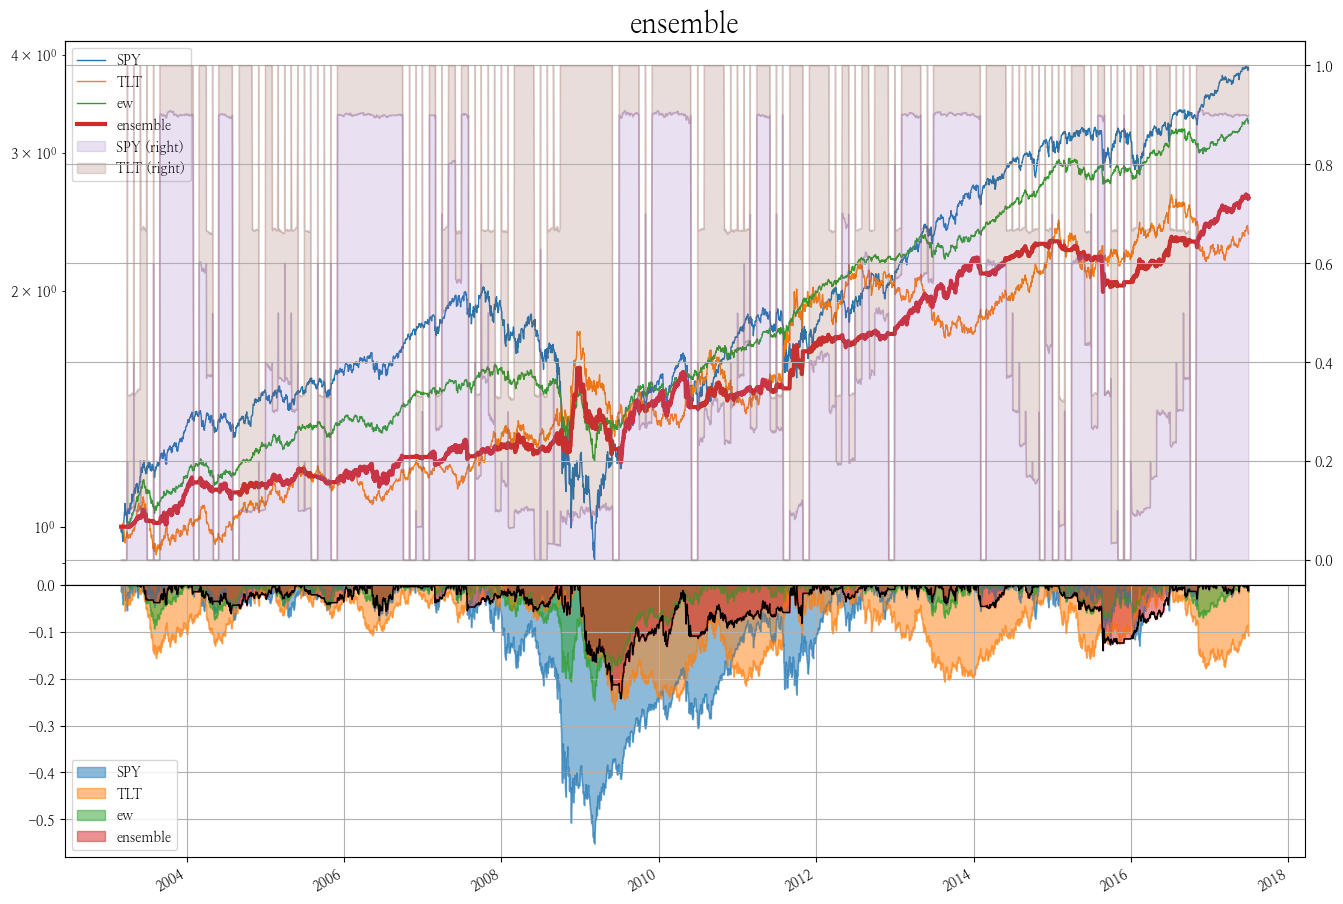

In [86]:
plot_assets(r_asset, start, e, 'ensemble')

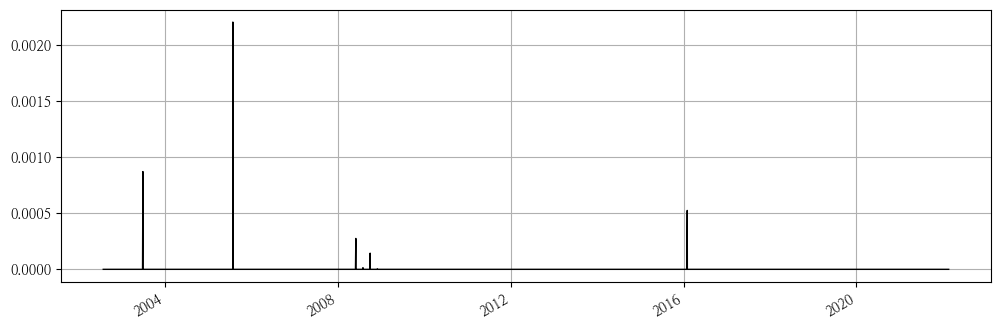

In [87]:
bt_ensemble.turnover.plot(c='black', figsize=(12, 4));